# Energy in Spain: dataset

The "energy.csv" dataset contains timeseries regarding the power market in Spain.

Explanation of columns:
* datetime: moment at which the observation happened, in UTC (https://en.wikipedia.org/wiki/Coordinated_Universal_Time)
* power_demand: total consumption of electricity in MWh (MegaWatt-hours) [consumption]
* nuclear: total energy generated in nuclear power plants in MWh [power generation]
* gas: total energy generated in gas powered plants in MWh [power generation]
* solar: total energy generated in solar farms in MWh [power generation]
* hydro: total energy generated in hydro dams in MWh [power generation]
* coal: total energy generated in coal powered plants in MWh [power generation]
* wind: total energy generated in wind farms in MWh [power generation]
* spot_price: price at which the energy is sold (generation) or bought (consumption) in €/MWh [price]

### Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Get the data as a pandas Dataframe

In [2]:
energy = pd.read_csv('energy.csv')

### Calculate the following

#### Shape (1 p)

In [3]:
energy.shape

(8737, 9)

In [4]:
energy.dtypes

datetime         object
power_demand    float64
nuclear         float64
gas             float64
solar           float64
hydro           float64
coal            float64
wind            float64
spot_price      float64
dtype: object

#### Create a list called "features" containing all the columns that are not "datetime" (1 p)

In [5]:
# use filter or list comprehensions or for loops or dark magic
features = energy.drop(['datetime'],axis=1)
features.values.tolist()

[[23251.2, 6059.2, 2954.0, 7.1, 3202.8, 1867.0, 3830.3, 66.88],
 [22485.0, 6059.2, 3044.1, 8.0, 2884.4, 1618.0, 3172.1, 66.88],
 [20977.0, 6059.2, 3138.6, 7.5, 1950.8, 1535.3, 2980.5, 66.0],
 [19754.2, 6059.2, 3596.2, 7.5, 1675.7, 1344.0, 2840.0, 63.64],
 [19320.6, 6063.4, 3192.6, 7.5, 1581.8, 1345.0, 3253.4, 58.85],
 [19262.3, 6063.4, 3167.9, 7.5, 1535.6, 1377.5, 3234.0, 55.47],
 [19175.3, 6063.4, 3336.2, 7.8, 1514.3, 1431.4, 3101.7, 56.0],
 [19708.1, 6063.4, 3372.7, 14.6, 1545.1, 1357.0, 2967.1, 61.09],
 [19595.9, 6063.4, 3296.1, 102.6, 1597.2, 1430.1, 2933.3, 61.01],
 [19858.8, 6062.4, 3505.9, 788.0, 1631.8, 1413.0, 2848.9, 61.0],
 [21750.7, 6066.4, 3565.5, 1843.3, 1697.8, 1365.2, 2596.7, 63.0],
 [23561.7, 6067.4, 4475.6, 2557.2, 1835.2, 1483.7, 1995.6, 63.0],
 [23975.0, 6067.4, 4679.7, 2905.5, 2085.9, 1629.1, 1688.2, 64.03],
 [24398.5, 6067.4, 4219.5, 2968.5, 2300.3, 1642.5, 1454.7, 65.88],
 [24508.0, 6067.4, 4443.0, 2792.3, 2247.0, 1641.1, 1398.4, 65.01],
 [22997.8, 6067.4, 3947.8

#### How many NaN are there in the dataset? (1 p)

In [6]:
# "Dealing with missing values" in the slides
energy.isna().sum() 

datetime           0
power_demand       0
nuclear            0
gas                0
solar           2392
hydro              0
coal             149
wind               0
spot_price         0
dtype: int64

#### Convert the "datetime" column into a Series containing datetime objects (0.5 p)

Pass utc=True as argument to your function of choice *cough* pd.to_dat... *cough*

In [7]:
# pandas datetime functionalities
energy.datetime=pd.to_datetime(energy.datetime,utc = True)
energy.dtypes

datetime        datetime64[ns, UTC]
power_demand                float64
nuclear                     float64
gas                         float64
solar                       float64
hydro                       float64
coal                        float64
wind                        float64
spot_price                  float64
dtype: object

#### Create the following columns (0.5 p)
* year
* month
* day
* hour
* weekday

In [8]:
# pandas datetime functionalities
energy['day'] = energy['datetime'].dt.day
energy['month'] = energy['datetime'].dt.month
energy['year'] = energy['datetime'].dt.year
energy['hour'] = energy['datetime'].dt.hour
energy['weekday'] = energy['datetime'].dt.weekday

energy.tail()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,day,month,year,hour,weekday
8732,2019-12-30 19:00:00+00:00,31160.6,7106.3,4400.0,0.1,7910.8,685.0,2013.5,47.50,30,12,2019,19,0
8733,2019-12-30 20:00:00+00:00,31152.9,7106.3,4832.3,NaN,7517.6,681.0,2096.7,46.42,30,12,2019,20,0
8734,2019-12-30 21:00:00+00:00,29151.0,7105.3,4467.0,NaN,7080.2,698.0,2028.3,42.76,30,12,2019,21,0
8735,2019-12-30 22:00:00+00:00,26989.6,7107.2,4672.2,NaN,6716.1,626.0,2031.8,40.88,30,12,2019,22,0
8736,2019-12-30 23:00:00+00:00,24350.5,7099.0,3765.9,NaN,6403.5,528.0,1927.2,37.55,30,12,2019,23,0


#### Create a "weekend" column containing True if day is Sat/Sun or False if day is Mon/Tue/... (1 p)

In [9]:
# feature engineering
# use your already beloved (map + lambda functions)
# or list comprehensions
energy.weekday.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [10]:
energy["weekend"] = np.where(energy["weekday"] > 4, True, False)
energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,day,month,year,hour,weekday,weekend
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,31,12,2018,23,0,False
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,1,1,2019,0,1,False
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,1,1,2019,1,1,False
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,1,1,2019,2,1,False
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,1,1,2019,3,1,False


#### Calculate the average values per weekday for the columns in "features" list (1 p)

In [11]:
# features is the list you created in the beginning
features['weekday']= energy['weekday']
features.groupby('weekday').mean()

,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
weekday,,,,,,,,
0,29207.582306,6390.911769,6483.540032,1382.902420,2919.916173,1282.017737,5846.823379,49.239688
1,29760.259375,6391.128526,6716.402003,1400.603377,2870.550401,1478.384477,5795.669712,50.202580
2,29814.897436,6399.605689,6448.102244,1386.101098,2856.419471,1444.195997,6451.173798,48.811442
3,29913.133253,6408.186458,6404.798397,1396.425420,2904.324439,1364.827287,6452.391747,48.817388
4,29587.505689,6404.227003,6362.183894,1437.464229,3027.978526,1294.994618,6071.198638,48.785793
5,26545.257933,6325.359535,4965.318109,1418.782988,2604.202644,1057.801583,5826.916346,45.429864
6,24759.381490,6353.419231,4089.475000,1373.876790,2439.531651,912.083292,6061.215064,42.653966


#### Create a function that returns the season out of a datetime object (0.5 p)
Use that function to create a "season" column

In [12]:
# easy peasy
season = []
for value in energy['month']: 
    if value == 12: 
        season.append("Winter")
    elif value == 1: 
        season.append("Winter")
    elif value == 2:
        season.append("Winter")
    elif value == 3:
        season.append("Spring")
    elif value == 4:
        season.append("Spring")
    elif value == 5:
        season.append("Spring")
    elif value == 6:
        season.append("Summer")
    elif value == 7:
        season.append("Summer")
    elif value == 8:
        season.append("Summer")
    elif value == 9:
        season.append("Fall")
    elif value == 10:
        season.append("Fall")
    else:
        season.append("Fall")
    
    
energy['season'] = season    
energy.season.value_counts()

Spring    2208
Summer    2208
Fall      2184
Winter    2137
Name: season, dtype: int64

#### Calculate average demand and spot_price for each season (1 p)

In [13]:
print('Average demand per Season:')
energy.groupby(["season"])['power_demand'].mean()

Average demand per Season:


season
Fall      27926.784112
Spring    27275.742482
Summer    29075.777038
Winter    29807.581563
Name: power_demand, dtype: float64

In [14]:
print('Average spot price per Season:')
energy.groupby(["season"])['spot_price'].mean()

Average spot price per Season:


season
Fall      43.859789
Spring    49.198279
Summer    47.866703
Winter    49.928872
Name: spot_price, dtype: float64

#### Why are there so many NaN values in the "solar" column? (0.5 p - extra)

In [15]:
energy.solar.isna().sum()

2392

In [16]:
energy.solar.eq(0).any().sum()

0

##### Answer: We have 2392 na s and we dont have zeroes this shows us that instead of putting zero they just leave the column blank. This is due to the weather as we know there isnt always sunlight por the solar panels to feed on. 

#### Calculate the total income for each type of power generation and total costs for consumption (4 p) 
Return a dictionary like the following one:

{ "consumption": cost_consumption, "wind": income_wind, "solar": income_solar, "gas": income_gas, ...} 

In [17]:
# Income = energy_generated * price
# Cost = energy_bought * price

data = energy.copy()
data = data[["power_demand","nuclear","gas","solar","hydro","coal","wind","spot_price"]]

consumption = energy.power_demand * energy.spot_price
consumption = round(consumption.sum(),0)

nuclear = energy.nuclear * energy.spot_price
nuclear = round(nuclear.sum(),0)

gas = energy.gas * energy.spot_price
gas = round(gas.sum(),0)

solar = energy.solar * energy.spot_price
solar = round(solar.sum(),0)

hydro = energy.hydro * energy.spot_price
hydro = round(hydro.sum(),0)

coal = energy.coal * energy.spot_price
coal = round(coal.sum(),0)

wind = energy.wind * energy.spot_price
wind = round(wind.sum(),0)

answer = {'consumption': [consumption], 'nuclear income': [nuclear], 
          'gas income': [gas], 'solar income': [solar],"hydro income":[hydro],
          "coal income": [coal], "wind income": [wind]}

print(answer)

{'consumption': [12115827296.0], 'nuclear income': [2674992442.0], 'gas income': [2577997503.0], 'solar income': [430157480.0], 'hydro income': [1179143191.0], 'coal income': [591516973.0], 'wind income': [2412917662.0]}


#### Create two plots: (2 p)
* Hourly average power demand
* Hourly average spot price

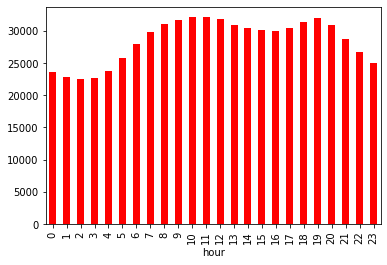

In [18]:
energy.groupby('hour')['power_demand'].mean()\
.plot(kind='bar',x ='hour',y='spot_price',color='red')

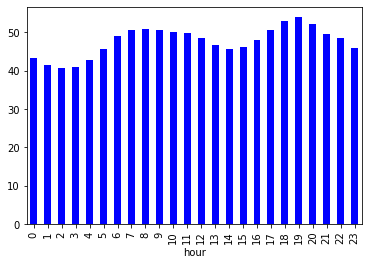

In [19]:
energy.groupby('hour')['spot_price'].mean()\
.plot(kind = 'bar',x = 'hour',y ='spot_price',color = 'blue')

#### Create a categorical variable called "wind_category" using the "wind" column (2 p)
Create 3 categories: low, mid, high

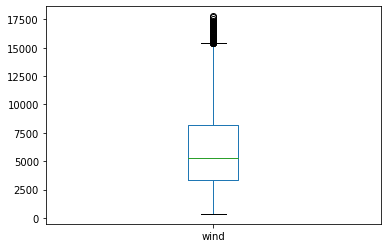

In [20]:
energy.wind.plot(kind='box')

In [21]:
energy.wind.min()

353.0

In [22]:
energy.wind.max()

17768.7

In [23]:
labels = ['low','mid','high']
bins = [352,6000,12000,17769]

energy['wind_category'] = pd.cut(energy['wind'], bins=bins, labels=labels)

energy.wind_category.value_counts()

low     5012
mid     3043
high     682
Name: wind_category, dtype: int64

#### Which is the power generation type that has generated the most energy? And the least? (2 p)

In [24]:
energy_highest = energy[["nuclear","gas","solar","hydro","coal","wind"]].sum()

energy_highest

nuclear    55758093.0
gas        51760818.5
solar       8878077.8
hydro      24492328.2
coal       10854073.8
wind       53052571.9
dtype: float64

In [25]:
print('Lowest Energy --> Solar', energy_highest.min())
print('Highest Energy --> Nuclear', energy_highest.max())

Lowest Energy --> Solar 8878077.800000014
Highest Energy --> Nuclear 55758092.99999979
